In [8]:
from street_signs_identify.detector.frcnn_detector import FRCDetector

model_path = "./street_signs_identify/detector/saved_models/frcnn.pth"
detector = FRCDetector(model_ckpt=model_path)

import numpy as np
from PIL import Image, ImageOps
img_path = "./street_signs_identify/all_data/220707_023452647_Camera_4.jpg"
image = Image.open(img_path).convert("RGB")
image = ImageOps.exif_transpose(image)
image = np.array(image)
detected_img = detector.detect(image)

In [9]:
print(detected_img._info)

   label     score   x0    y0    x1    y1
0      5  0.999229  294  1175   996  1373
1      5  0.998907  304   993  1009  1197
2      7  0.997746  340   814  1007  1021


0.9992289543151855
5
0.9989069700241089
5
0.9977462887763977
7


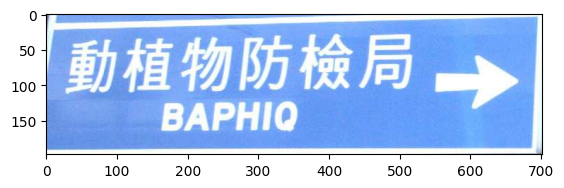

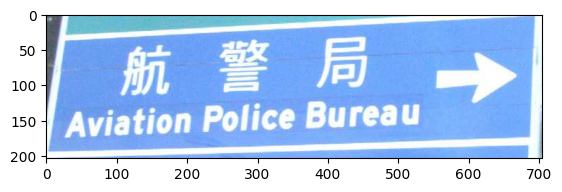

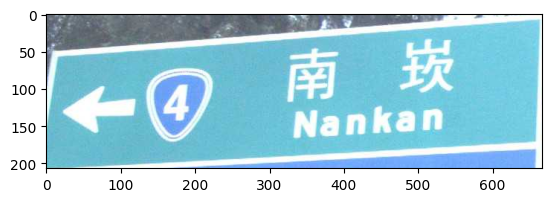

In [10]:
import matplotlib.pyplot as plt

for detected_instance in detected_img:
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.imshow(detected_instance.image)
    print(detected_instance.score)
    print(detected_instance.info)

plt.show()

In [11]:
instance_0 = detected_img[0]
instance_1 = detected_img[1]
instance_2 = detected_img[2]

In [12]:
from street_signs_identify.recognizer.ocr_recognizer import TextReader

model_ckpt = "./street_signs_identify/recognizer/saved_models/epoch_6701.pth"
recognizer = TextReader(model_ckpt)

In [13]:
result = recognizer.recognizeDetectedInstance(*detected_img)

[DetectedInstance(bbox=[[0, 0], [702, 0], [702, 198], [0, 198]], info='動臨檢局', score=0.5686531066894531, _ref_image=array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        ...,
 
        [[254, 254, 254],
         [254, 254, 254],
         [254, 254, 254],
         ...,
         [168, 188, 195],
         [168, 188, 197],
         [168, 188, 195]],
 
        [[254, 254, 254],
         [254, 254, 254],
         [254, 254, 254],
         ...,
         [189, 216, 223],
         [188, 215, 224],
         [187, 214, 221]],
 
      